In [1]:
import pandas as pd
import numpy as np

In [2]:
A=pd.read_csv("F:/datascience/Python/50_Startups (with-header).csv")

In [3]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
X=A[['RND','ADMIN','MKT']]
Y=A['PROFIT']

# Scalarizing

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler=StandardScaler()

In [8]:
Y1=scaler.fit_transform(Y)

C:\Users\N N kundan\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\N N kundan\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [14]:
X1=scaler.fit_transform(X)

# Initializing bias and weights randomly

In [15]:
import random

In [16]:
def initialize(dim):
    np.random.seed(seed=42)
    random.seed(42)
    b=random.random()
    w=np.random.rand(dim)
    return b, w

In [17]:
b,w=initialize(3)

In [18]:
print("Bias:", b, "Variance :", w)

('Bias:', 0.6394267984578837, 'Variance :', array([ 0.37454012,  0.95071431,  0.73199394]))


# Predict Y values based on bias and variance

In [20]:
def pred(b,w,X):
    return b+np.matmul(X,w)

In [21]:
Y_pred=pred(b,w,X1)

In [22]:
Y_pred[0:10]

array([ 3.50444291,  3.80947851,  1.79475043,  2.17118971,  1.1144619 ,
        1.29885612,  1.52381954,  2.61710883,  2.57185494,  1.18232842])

# calculating the cost function-MSE

In [23]:
import math

In [24]:
def get_cost(Y1,Y_pred):
    Y_resid=Y1-Y_pred
    return np.sum(np.matmul(Y_resid.T,Y_resid))/len(Y_resid)

In [25]:
get_cost(Y1,Y_pred)

1.3083506843908639

# updating the bias and variance

In [26]:
def update_beta(x,y,y1,b_0,w_0,learning_rate):
    db=(np.sum(y1-y)*2)/len(y)
    dw=(np.dot((y1-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    w_1=w_0-learning_rate*dw
    return b_1,w_1

In [27]:
print("After initializing-bias:",b,"weights:",w)
b,w=update_beta(X1,Y1,Y_pred,b,w,0.01)
print("After initializing-bias:",b,"weights:",w)

('After initializing-bias:', 0.6394267984578837, 'weights:', array([ 0.37454012,  0.95071431,  0.73199394]))
('After initializing-bias:', 0.62663826248872612, 'weights:', array([ 0.37130381,  0.93437264,  0.72749556]))


In [28]:
def run_gradient_descent(x,y,alpha=0.01,num_iterations=100):
    b,w=initialize(x.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iterations','cost'])
    result_idx=0
    for each_iter in range(num_iterations):
        Y_pred=pred(b,w,x)
        this_cost=get_cost(y,Y_pred)
        prev_b=b
        prev_w=w
        b,w=update_beta(x,y,Y_pred,prev_b,prev_w,alpha)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx=result_idx+1
        iter_num+=1
    print("Final estimate of b and w:", b,w)
    return gd_iterations_df,b,w

In [30]:
gd_iterations_df,b,w=run_gradient_descent(X1,Y1,alpha=0.001,num_iterations=200)

('Final estimate of b and w:', 0.42844895817391454, array([ 0.34286613,  0.68242174,  0.66135398]))


In [31]:
gd_iterations_df[0:10]

,iterations,cost
0,0.0,1.308351
1,10.0,1.263163
2,20.0,1.219899
3,30.0,1.178470
4,40.0,1.138791
5,50.0,1.100781
6,60.0,1.064364
7,70.0,1.029466
8,80.0,0.996019
9,90.0,0.963956


In [32]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

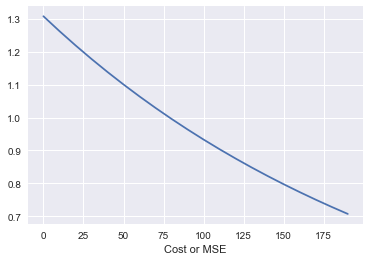

In [33]:
plt.plot(gd_iterations_df['iterations'],gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.xlabel("Cost or MSE")

In [34]:
print("Final estimates of b and w:", b,w)

('Final estimates of b and w:', 0.42844895817391454, array([ 0.34286613,  0.68242174,  0.66135398]))


In [38]:
alpha_df_1,b,w=run_gradient_descent(X1,Y1,alpha=0.01,num_iterations=1000)

('Final estimate of b and w:', 1.0761339846983752e-09, array([ 0.909639  , -0.01584355,  0.09016   ]))


In [39]:
alpha_df_2,b,w=run_gradient_descent(X1,Y1,alpha=0.001,num_iterations=1000)

('Final estimate of b and w:', 0.086363875173325486, array([ 0.45481223,  0.23442177,  0.50672349]))


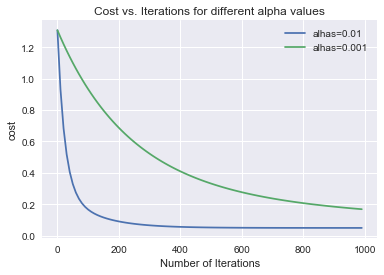

In [41]:
plt.plot(alpha_df_1['iterations'],alpha_df_1['cost'],label="alhas=0.01")
plt.plot(alpha_df_2['iterations'],alpha_df_2['cost'],label="alhas=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of Iterations')
plt.title('Cost vs. Iterations for different alpha values')